# Lab: Trees

Lab associated with Module: Trees

***

In [ ]:
# The following lines are used to increase the width of cells to utilize more space on the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [ ]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [ ]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [ ]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

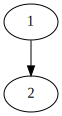

In [ ]:
dot

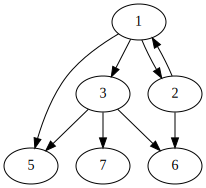

In [ ]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [ ]:
class Node:

    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None


def buildBinaryTree(nodes):

    if len(nodes) == 0:
        raise ValueError('list is empty')

    return binaryTree(nodes, 0, len(nodes) - 1)

def binaryTree(nodes, start, end):

    if start > end:
        return

    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)

    return root

In [ ]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [ ]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [ ]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [ ]:
test3_tree = buildBinaryTree(test3)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [ ]:
def visualize_tree(tree):

    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)

        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot

    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)

    return dot

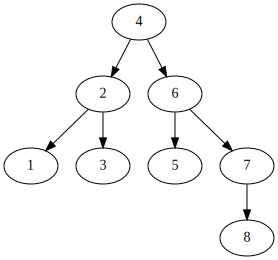

In [ ]:
dot = visualize_tree(test1_tree)

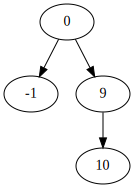

In [ ]:
dot = visualize_tree(test2_tree)

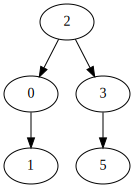

In [ ]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [ ]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:

        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:

        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [ ]:
search(test3_tree, 3)

True

In [ ]:
search(test1_tree, 18)

False

Let us write insert function now:

In [ ]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None:
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:

        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return

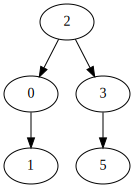

In [ ]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

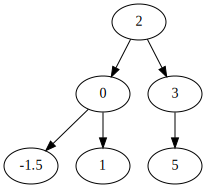

In [ ]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

In [ ]:
def minValueNode(node):
    current = node

    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left

    return current

def delete(nodes, val):

    if nodes == None:
        return nodes

    if val < nodes.val:

        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:

        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:

        # Node with only one child or no child

        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp

        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)

        nodes.val = temp.val

        nodes.right = delete(nodes.right, temp.val)

    return nodes

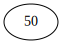

In [ ]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

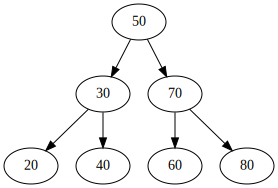

In [ ]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

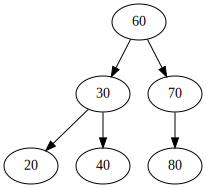

In [ ]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

***

#Code Implementations
##(1) Modify the BST so that it can keep track of its balance.
####For the purpose of this question, a balanced tree is defined to be a tree such that the heights of the two subtrees of any node never differs by more than one.
#####- You are expected to create a new field in each node which stores the balance of the node.
#####- Note, when a node is inserted and deleted, the balance must be updated.
#####-Write a function to test the balance of a tree, which returns True or False depending if the
tree is balanced or not.

In [ ]:
class Node:
    def __init__(self, val):
        self.val = val
        self.right = None
        self.left = None
        self.balance = 0 #New field
        self.parent = None

def buildBinaryTree(nodes):
    if len(nodes) == 0:
        raise ValueError('No values in list')
    return binaryTree(nodes, 0, len(nodes) - 1)

def binaryTree(nodes, start, end):
    if start > end:
        return
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    return root

#Test the balance of a tree, which returns True or False depending on balance
def is_balanced(tree):
    if tree is None:
        return True
    left_height = tree.left.balance if tree.left else -1
    right_height = tree.right.balance if tree.right else -1
    return abs(left_height - right_height) <= 1 and is_balanced(tree.left) and is_balanced(tree.right)

def height(node):
    if node is None:
        return -1
    left_height = height(node.left)
    right_height = height(node.right)
    return max(left_height, right_height) + 1

def update_balance(node):
    left_height = height(node.left)
    right_height = height(node.right)
    node.balance = right_height - left_height

def insert(nodes, val):
    if nodes is None:
        return Node(val)

    if val < nodes.val:
        nodes.left = insert(nodes.left, val)
    else:
        nodes.right = insert(nodes.right, val)

    update_balance(nodes) #balance updated
    return nodes

def delete(nodes, val):
    if nodes is None:
        return nodes

    if val < nodes.val:
        nodes.left = delete(nodes.left, val)
    elif val > nodes.val:
        nodes.right = delete(nodes.right, val)
    else:
        if nodes.left is None:
            return nodes.right
        elif nodes.right is None:
            return nodes.left

        temp = minValueNode(nodes.right) #use above function
        nodes.val = temp.val
        nodes.right = delete(nodes.right, temp.val)

    update_balance(nodes) #balance updated
    return nodes

In [ ]:
def visualize_tree(tree):
    dot = Digraph()

    def add_nodes_edges(node, dot):
        if node:
            dot.node(name=str(node), label=f"{node.val}    (B: {node.balance})")  # Include balance
            if node.left:
                dot.edge(str(node), str(node.left))
                dot = add_nodes_edges(node.left, dot)

            if node.right:
                dot.edge(str(node), str(node.right))
                dot = add_nodes_edges(node.right, dot)

        return dot

    dot = add_nodes_edges(tree, dot)
    display(dot)
    return dot

## *Test Cases 1*

Insert values: [1, 2, 3, 4, 5, 6, 7, 8]
Check for Balanced Tree: True


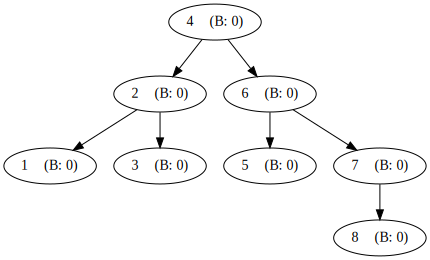


Insert Value: 9
Check for Balanced Tree: False


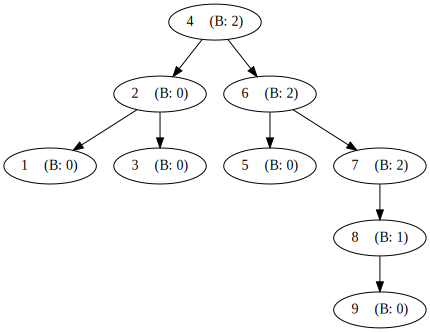


Delete Value: 5
Check for Balanced Tree: False


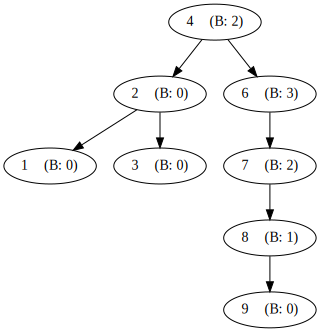

In [ ]:
# Test cases
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test1_tree = buildBinaryTree(test1)
print(f"Insert values: {test1}")
print(f"Check for Balanced Tree: {is_balanced(test1_tree)}")
dot = visualize_tree(test1_tree)
print()

# Inserting a new value
insert(test1_tree, 9)
print("Insert Value: 9")
print(f"Check for Balanced Tree: {is_balanced(test1_tree)}")
dot = visualize_tree(test1_tree)
print()

# Deletion in test1_tree
delete(test1_tree, 5)
print("Delete Value: 5")
print(f"Check for Balanced Tree: {is_balanced(test1_tree)}")
dot = visualize_tree(test1_tree)
print()

***

##(2) Write an algorithm (and code) to find the first common ancestor of two nodes in a binary search tree.
#### Your function will take as input arguments: two nodes and a Binary Search Trees (BST). Your algorithm should first search the nodes and then determine what is the first common ancestor node. The common ancestor node should be returned.

In [ ]:
def find_common_ancestor(root, node1, node2):
    # Function added with test case of checking unknown values
    def find_node(root, target):
        if root is None:
            return False
        if root.val == target.val:
            return True
        if root.val > target.val:
            return find_node(root.left, target)
        return find_node(root.right, target)

    # Check if both nodes are present in the BST
    if not find_node(root, node1) or not find_node(root, node2):
        return Node("unknown")

    # Find the common ancestor
    current = root
    while current is not None:
        if current.val > node1.val and current.val > node2.val:
            current = current.left
        elif current.val < node1.val and current.val < node2.val:
            current = current.right
        else:
            return current # Found first common ancestor

    return Node("unknown")  # No common ancestor found


## *Test Cases 2*

First Common Ancestor (1 & 3): 2

First Common Ancestor (2 & 6): 4

First Common Ancestor (10 & 5): unknown



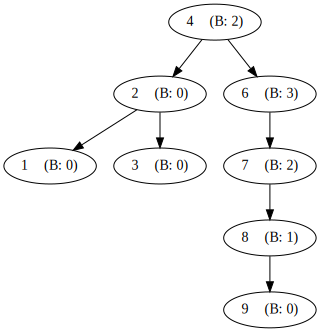

In [ ]:
# Find the first common ancestor of nodes with values 1 and 3
node1 = Node(1)
node2 = Node(3)
common_ancestor = find_common_ancestor(test1_tree, node1, node2)
print("First Common Ancestor (1 & 3):", common_ancestor.val)
print()

# Find the first common ancestor of nodes with values 2 and 6
node3 = Node(2)
node4 = Node(6)
common_ancestor2 = find_common_ancestor(test1_tree, node3, node4)
print("First Common Ancestor (2 & 6):", common_ancestor2.val)
print()

# Find the first common ancestor of nodes not in BST
node3 = Node(10)
node4 = Node(5)
common_ancestor2 = find_common_ancestor(test1_tree, node3, node4)
print("First Common Ancestor (10 & 5):", common_ancestor2.val)
print()

#Visualise Tree
dot = visualize_tree(test1_tree)

***

## (3) In the seminar, we discussed how various trees such as AVL or Red Black trees make extensive use of rotation operation.
##### In fact, if you can perform rotations easily, you can code insertion and deletion in AVL and RB trees. Write an algorithm (and code) to perform following form of rotations on any specified node of a BST? You can assume that nodes P, Q and C does exist in your tree. Your function should take the tree as well as a node at which to perform rotation, as input arguments, and then return a tree in which rotation is performed:
#### - a right rotation,
#### - a left rotation,
#### - a left-right rotation,
#### - a right-left rotation.

In [ ]:
# I spent more time on code comments in this cell as rotations initially confused me
# Function for right rotation
def rotate_right(nodes, val):
  # Find parent of input node (val)
  parent = findParent(nodes, val)
  p = val.left # Store left child of val in p
  q = p.right # Store right child of p in q

  # Perform rotation
  p.right = val
  val.left = q

  update_balance(val)  # Update balance rotated node
  update_balance(p)    # Update balance new root of subtree

  # Update parent pointers
  if parent != None:
      if parent.right == val:
          parent.right = p
      else:
          parent.left = p

  update_balance(nodes) # Upgate balance tree
  return p

# Function for left rotation
def rotate_left(nodes, val):
  # Find parent of input node (val)
  parent = findParent(nodes, val)
  p = val.right # Store right child of val in p
  q = p.left # Store left child of p in q

  # Perform rotation
  p.left = val
  val.right = q

  update_balance(val)  # Update balance rotated node
  update_balance(p)    # Update balance new root of subtree

  # Update parent pointers
  if parent != None:
      if parent.left == val:
          parent.left = p
      else:
          parent.right = p

  update_balance(nodes) # Upgate balance tree
  return p

# Function for left-right rotation
def left_right_rotation(nodes, val):
  test_tree = rotate_left(nodes, val) # Left rotation
  test_tree2 = rotate_right(test_tree, val) # Right rotation
  return test_tree2 # new subtree

# Function for right-left rotation
def right_left_rotation(nodes, val):
  test_tree3 = rotate_right(nodes, val) # Right rotation
  test_tree3 = rotate_left(test_tree3, val) # Left rotation
  return test_tree3 # new subtree

# Find node
def find_node(nodes, val):
  # Current node has val
  if val == nodes.val:
      return nodes

  if val < nodes.val: # Search in left subtree
      if nodes.left == None:
          return False
      return find_node(nodes.left, val)

  elif val >= nodes.val: # Search in right subtree
      if nodes.right == None:
          return False
      return find_node(nodes.right, val)

# Find Parent, searching left subtree to avoid recursion
def findParent(tree, node):
  # Current node no children = root and parent
  if tree.left is None and tree.right is None:
      return tree

  # Current node = target node, current = parent
  if tree.val == node:
      return tree
  elif tree.val > node.val: # Search left tree
      if tree.left.val == node.val:
          return tree
      else:
          return findParent(tree.left, node)

## *Test Cases 3.1*
#### - Left Rotation

Original Tree:


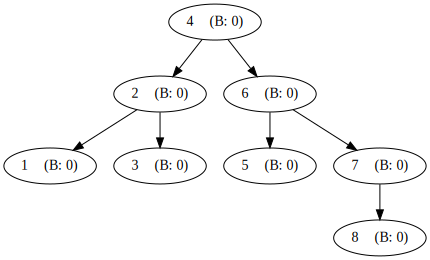


Left Rotation:


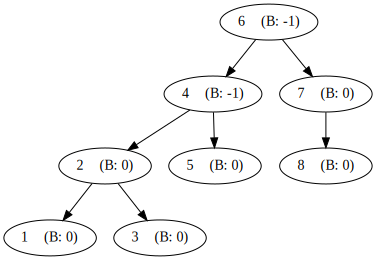

In [ ]:
# Left Rotation Test
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2_tree = buildBinaryTree(test1)

# Display the original tree
print("Original Tree:")
visualize_tree(test2_tree)
print()

# Performing left rotation at node with value 4
test_node1 = find_node(test2_tree, 4)
test2_tree = rotate_left(test2_tree, test_node1)
print("Left Rotation:")
visualize_tree(test2_tree)
print()

## *Test Cases 3.2*
#### - Right Rotation

Original Tree:


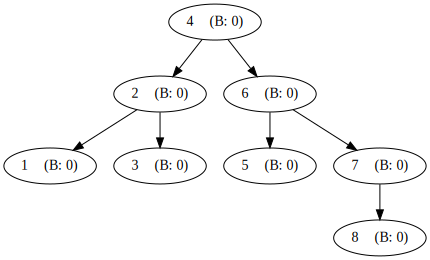


Right Rotation:


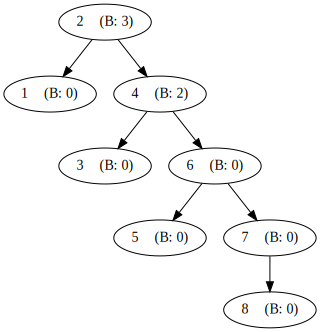

In [ ]:
# Right Rotation Test
test3_tree = buildBinaryTree(test1)

# Display the original tree
print("Original Tree:")
visualize_tree(test3_tree)
print()

# Performing left rotation at node with value 4
test_node2 = find_node(test3_tree, 4)
test3_tree = rotate_right(test3_tree, test_node2)
print("Right Rotation:")
visualize_tree(test3_tree)
print()

## *Test Cases 3.3*
#### - Left-Right Rotation

Original Tree:


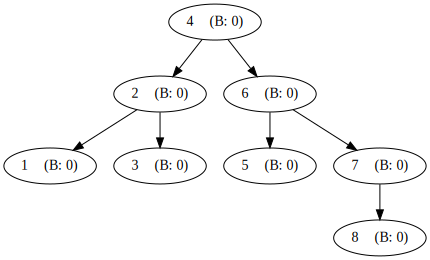


Left-Right Rotation Rotation:


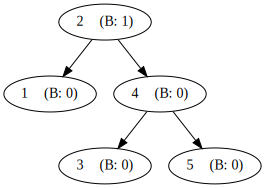

In [ ]:
# Left-Right Rotation Test
test4_tree = buildBinaryTree(test1)

# Display the original tree
print("Original Tree:")
visualize_tree(test4_tree)
print()

# Performing left-Right rotation at node with value 4
test_node2 = find_node(test4_tree, 4)
test4_tree = left_right_rotation(test4_tree, test_node2)
print("Left-Right Rotation Rotation:")
visualize_tree(test4_tree)
print()

## *Test Cases 3.4*
#### - Right-Left Rotation

Original Tree:


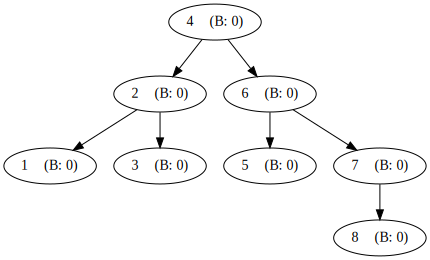


Right-Left Rotation Rotation:


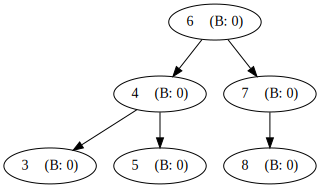

In [ ]:
# Left-Right Rotation Test
test5_tree = buildBinaryTree(test1)

# Display the original tree
print("Original Tree:")
visualize_tree(test5_tree)
print()

# Performing left-Right rotation at node with value 4
test_node3 = find_node(test5_tree, 4)
test5_tree = right_left_rotation(test5_tree, test_node3)
print("Right-Left Rotation Rotation:")
visualize_tree(test5_tree)
print()